### Decision Tree Classifier

A modo de utilizar la herramienta objetivo de la clase, se decide desarrollar el algoritmo utilizando el dataset de Titanic, cuyo objetivo es validar segun diferentes características de la persona, si esta sobrevive o no 

In [ ]:
#Se importan las librerias y el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv('/content/Titanic.csv', sep = ",")

In [ ]:
#Se muestran los encabezados del dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [ ]:
#Se muestra la forma del dataset
print(titanic.shape)

(714, 6)


In [ ]:
#Se verifican valores nulos y el tipo de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 33.6 KB


In [ ]:
#Se separa en variables y targets el dataset
X = titanic.drop("Survived", axis=1) #Elimino de mi dataset la variable a predecir
y = titanic.Survived #Defino el Target

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [ ]:
#Entrenamiento del modelo
arbol_de_decision.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
#Predicción
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [ ]:
#Cálculo de aciertos
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8096192384769539
% de aciertos sobre el set de evaluación: 0.786046511627907


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


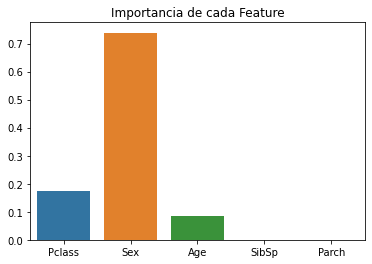

In [ ]:
#Grafico de importancias de las variables
import seaborn as sns

importances = arbol_de_decision.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Como conclusión, el porcentaje de acierto para el arbol de decisión del dataset de titanic es del 78%. Tambien, resaltando que si eras mujer, tenias mayor posibilidades de sobrevivir, seguido por la clase y por último la edad.